In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
%load_ext autoreload
%autoreload 2
import utils
import webdataset as wds

subj = 1

data_path = "/home/juhyeon/fsx/proj-medarc/fmri/natural-scenes-dataset"

train_url = "{" + f"{data_path}/webdataset_avg_split/train/train_subj0{subj}_" + "{0..17}.tar," + f"{data_path}/webdataset_avg_split/val/val_subj0{subj}_0.tar" + "}"
val_url = f"{data_path}/webdataset_avg_split/test/test_subj0{subj}_" + "{0..1}.tar"
print(train_url,"\n",val_url)
meta_url = f"{data_path}/webdataset_avg_split/metadata_subj0{subj}.csv"
num_train = 8559 + 300
num_val = 982

cache_dir="/tmp/wds-cache"
my_split_by_node = (lambda urls: urls)
train_data = wds.WebDataset(train_url, resampled=True, cache_dir=cache_dir, nodesplitter=my_split_by_node)

/home/dongho/anaconda3/envs/temp/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


{/home/juhyeon/fsx/proj-medarc/fmri/natural-scenes-dataset/webdataset_avg_split/train/train_subj01_{0..17}.tar,/home/juhyeon/fsx/proj-medarc/fmri/natural-scenes-dataset/webdataset_avg_split/val/val_subj01_0.tar} 
 /home/juhyeon/fsx/proj-medarc/fmri/natural-scenes-dataset/webdataset_avg_split/test/test_subj01_{0..1}.tar


In [3]:
# import json 
# import pandas as pd

# metadata = pd.read_csv(meta_url)

In [3]:
print('Prepping train and validation dataloaders...')
train_dl, val_dl, num_train, num_val = utils.get_dataloaders(
    32,
    'images',
    num_devices=torch.cuda.device_count(),
    # num_workers=torch.cuda.device_count() * 4,
    num_workers=1, #FIXME: num_workers=1 for now
    train_url=train_url,
    val_url=val_url,
    meta_url=meta_url,
    num_train=num_train,
    num_val=num_val,
    val_batch_size=1,
    cache_dir=data_path, #"/tmp/wds-cache",
    seed=0,
    voxels_key='nsdgeneral.npy',
    to_tuple=["voxels", "images", "coco", "brain_3d"],
    local_rank=0,
    world_size=1,
    subj=subj,
)

Prepping train and validation dataloaders...
Getting dataloaders...
in utils.py: num_devices: 4

num_train 8859
global_batch_size 128
batch_size 32
num_workers 1
num_batches 69
num_worker_batches 69

num_val 982
val_num_batches 7
val_batch_size 1


voxels.shape: torch.Size([32, 3, 15724])
image.shape: torch.Size([32, 3, 256, 256])
cocoid.shape: torch.Size([32, 1])
brain_3d.shape: torch.Size([32, 3, 81, 104, 83])
tensor([-0.0286, -1.5840,  0.7563,  ...,  1.5869, -0.6016, -0.6240],
       dtype=torch.float16)


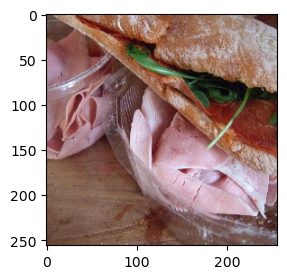

cocoid: tensor([13805])
tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        ...,

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.]

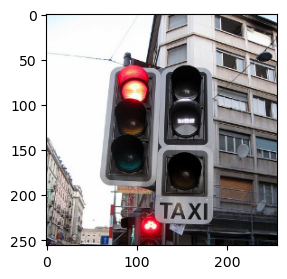

cocoid: tensor([11483])
tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        ...,

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.]

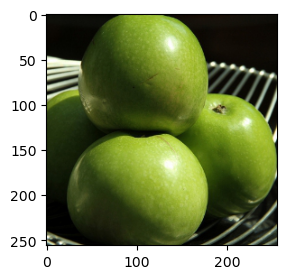

cocoid: tensor([11116])
tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        ...,

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.]

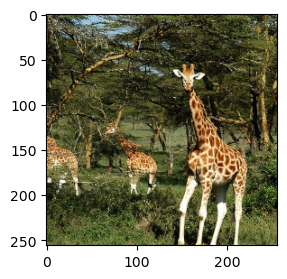

cocoid: tensor([14180])
tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        ...,

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.]

In [5]:
'''
voxels: (B, 3, 15724) # may vary slightly
image: (B, 3, 256, 256) 
cocoid: (B, 1)
brain_3d: (B, 3, 81, 104, 83) # may vary slightly
'''

for i, (voxels, image, cocoid, brain_3d) in enumerate(train_dl):
    if (i==1): break
    print(f"voxels.shape: {voxels.shape}")
    print(f"image.shape: {image.shape}")
    print(f"cocoid.shape: {cocoid.shape}")
    print(f"brain_3d.shape: {brain_3d.shape}")

    repeat_index = i % 3
    for j in range(4):
        print(voxels[j, repeat_index])
        plt.figure(figsize=(3, 3))
        plt.imshow(utils.torch_to_Image(image[j]))
        plt.show()
        print(f"cocoid: {cocoid[j]}")
        print(brain_3d[j][repeat_index])

        
